# Accessing Dataset

[def]: D:\courses-pacmann\project-datawrangling-sql\data-schema.png "Data Schema"
![data-schema][def]



## Objectives
1. Analisa Product
    - Contoh: Menganalisa produk / item yang di order customer(kategori)
    - Kota yang paling banyak melakukan order  
2. Analisa Sales
    - Contoh: Menganalisa Trend Sales bulanan / tiap region
    - Tipe pembayaran
    - Kota dengan revenue tertinggi
    - Total revenue per payment method


In [1]:
# sqlite3 used to integrate SQLite database with Python
import sqlite3

# pandas and numpy for data manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)  

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator, YearLocator

import warnings
warnings.filterwarnings("ignore")

## Data Collection

### Load Dataset

In [2]:
def get_result(query): # Create the get_result function
    dbfile = 'D:\courses-pacmann\project-datawrangling-sql\Dataset\olist.db' # Create file path
    connection = sqlite3.connect(dbfile) # Accessing the dbfile
    cursor = connection.cursor() # Create a cursor object to execute SQL commands on a database
    cursor.execute(query) # Executing SQL commands
    data = cursor.fetchall() # Retrieve the result of SQL commands
    cursor.close() # Close the cursor
    connection.close() # Close connection
    return(data) # Return to the SQL command result

### View the names of tables and columns in the dataset

In [3]:
# Define SQL commands to view tables in the olist database
query_get_tables = "SELECT name FROM sqlite_master WHERE type='table';"

# Run SQL command using get_result function
tables = get_result(query_get_tables) # View tables in the dbfile

# Show table names
for table in tables:
    table_name = table[0]
    print(f'Table Name : {table_name}')

    # Define the SQL command to get the column structure of the table
    query_get_column = f'PRAGMA table_info({table_name});'

    # Run SQL command using get_result function
    columns = get_result(query_get_column)

    # Display the names of the columns in the table
    for column in columns:
        column_name = column[1]
        print(f' Column    : {column_name}')


Table Name : olist_order_customer_dataset
 Column    : index
 Column    : customer_id
 Column    : customer_unique_id
 Column    : customer_zip_code_prefix
 Column    : customer_city
 Column    : customer_state
Table Name : olist_order_dataset
 Column    : index
 Column    : order_id
 Column    : customer_id
 Column    : order_status
 Column    : order_purchase_timestamp
 Column    : order_approved_at
 Column    : order_delivered_carrier_date
 Column    : order_delivered_customer_date
 Column    : order_estimated_delivery_date
Table Name : olist_order_reviews_dataset
 Column    : index
 Column    : review_id
 Column    : order_id
 Column    : review_score
 Column    : review_comment_title
 Column    : review_comment_message
 Column    : review_creation_date
 Column    : review_answer_timestamp
Table Name : olist_order_payments_dataset
 Column    : index
 Column    : order_id
 Column    : payment_sequential
 Column    : payment_type
 Column    : payment_installments
 Column    : payment

### Creating Dataframes

In [4]:
# Function for creating a dataframe
def create_df(data, columns):
    process_data  = pd.DataFrame(data=data, columns=columns).drop('index', axis=1)

    # Reset column index
    process_data = process_data.reset_index(drop=True)

    # Combine multiple index levels to create a single column index
    process_data.columns = [''.join(col).strip() for col in process_data.columns.values]

    return process_data

In [5]:
# Creates column variables for each table

# Customer Column
olist_customer_column = ['index','customer_id','customer_unique_id','customer_zip_code_prefix','customer_city','customer_state']

# Order Column
olist_order_column = ['index','order_id','customer_id','order_status','order_purchase_timestamp','order_approved_at',
                      'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

# Order Review Column
olist_order_reviews_column = ['index','review_id','order_id','review_score','review_comment_title','review_comment_message',
                              'review_creation_date','review_answer_timestamp']

# Order Payment Column
olist_order_payments_column = ['index','order_id','payment_sequential','payment_type','payment_installments','payment_value']

# Order Item Column
olist_order_items_column = ['index','order_id','order_item_id','product_id','seller_id','shipping_limit_date','price','freight_value']

# Product Column
olist_products_column = ['index','product_id','product_category_name','product_name_lenght','product_description_lenght',
                         'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']

# Seller Column
olist_sellers_column = ['index','seller_id','seller_zip_code_prefix','seller_city','seller_state']

# Geolocation Column
olist_geolocation_column = ['index','geolocation_zip_code_prefix','geolocation_lat','geolocation_lng',
                            'geolocation_city','geolocation_state']

# Product Category Column
olist_product_category_column = ['index','product_category_name','product_category_name_english']

In [6]:
# Retrieve all dataset

# Create df Customer
olist_customer = create_df(get_result('SELECT * FROM olist_order_customer_dataset'),olist_customer_column)

# Create df Order
olist_order = create_df(get_result('SELECT * FROM olist_order_dataset'),olist_order_column)

# Create df Order Review
olist_order_reviews = create_df(get_result('SELECT * FROM olist_order_reviews_dataset'),olist_order_reviews_column)

# Create df Order Paayment
olist_order_payment = create_df(get_result('SELECT * FROM olist_order_payments_dataset'),olist_order_payments_column)

# Create df Order Item
olist_order_items = create_df(get_result('SELECT * FROM olist_order_items_dataset'),olist_order_items_column)

# Create df Product
olist_products = create_df(get_result('SELECT * FROM olist_products_dataset'),olist_products_column)

# Create df Seller
olist_sellers = create_df(get_result('SELECT * FROM olist_sellers_dataset'),olist_sellers_column)

# Create df Geolocation
olist_geolocation = create_df(get_result('SELECT * FROM olist_geolocation_dataset'),olist_geolocation_column)

# Create df Product Category
olist_product_category = create_df(get_result('SELECT * FROM product_category_name_translation'),olist_product_category_column)

In [7]:
# Merge the necessary tables
df_olist = pd.merge(olist_customer, olist_order, on='customer_id', how='inner')
df_olist = df_olist.merge(olist_order_payment, on='order_id', how="inner")
df_olist = df_olist.merge(olist_order_items, on='order_id', how="inner")
df_olist = df_olist.merge(olist_products, on='product_id', how="inner")
df_olist = df_olist.merge(olist_product_category, on='product_category_name', how="inner")

In [8]:
# Make a copy of df_olist dataframe
# df_olist_raw = df_olist.copy()

- Classify product names into multiple product categories

In [9]:
# Show unique value at product_category_name_english column
column_product_categories = df_olist['product_category_name_english'].unique()
for i in column_product_categories:
    print(i)

office_furniture
housewares
home_confort
sports_leisure
computers_accessories
toys
furniture_decor
auto
air_conditioning
telephony
health_beauty
garden_tools
pet_shop
bed_bath_table
baby
watches_gifts
kitchen_dining_laundry_garden_furniture
perfumery
art
stationery
fashio_female_clothing
consoles_games
construction_tools_lights
food_drink
drinks
cool_stuff
fashion_bags_accessories
home_construction
luggage_accessories
electronics
home_appliances_2
fashion_male_clothing
small_appliances
small_appliances_home_oven_and_coffee
books_general_interest
home_appliances
costruction_tools_tools
signaling_and_security
musical_instruments
construction_tools_construction
music
fashion_shoes
industry_commerce_and_business
fashion_underwear_beach
dvds_blu_ray
construction_tools_safety
food
fixed_telephony
furniture_living_room
tablets_printing_image
market_place
christmas_supplies
agro_industry_and_commerce
costruction_tools_garden
computers
furniture_bedroom
audio
books_imported
books_technical
part

In [10]:
# Create a product category classification function
def classify_product(x):
    categories = {
        'Beauty & Health': ['health_beauty','perfumery','diapers_and_hygiene'],
        'Book & Stationary': ['stationery','books_general_interest','books_imported','books_technical'],
        'Electronics': ['computers_accessories','auto','air_conditioning','telephony','watches_gifts','consoles_games',
                        'electronics','small_appliances','small_appliances_home_oven_and_coffee','signaling_and_security',
                        'musical_instruments','fixed_telephony','tablets_printing_image','computers','audio','security_and_services'],
        'Entertainment': ['sports_leisure','toys','art','music','dvds_blu_ray','christmas_supplies','party_supplies','cine_photo',
                        'cds_dvds_musicals','arts_and_craftmanship'],
        'Fashion': ['baby','fashio_female_clothing','cool_stuff','fashion_bags_accessories','fashion_male_clothing','fashion_shoes',
                    'fashion_underwear_beach','fashion_sport','fashion_childrens_clothes'],
        'Food & Drinks': ['food_drink','drinks','food'],
        'Furniture': ['office_furniture','home_confort','furniture_decor','bed_bath_table','kitchen_dining_laundry_garden_furniture',
                    'home_construction','furniture_living_room','furniture_bedroom','furniture_mattress_and_upholstery','home_comfort_2'],
        'Home & Garden': ['housewares','garden_tools','pet_shop','construction_tools_lights','luggage_accessories','home_appliances_2',
                        'home_appliances','market_place','costruction_tools_garden','la_cuisine','flowers'],
        'Industry & Construction': ['costruction_tools_tools','construction_tools_construction','industry_commerce_and_business',
                                    'construction_tools_safety','agro_industry_and_commerce']
                    }
    for category, keywords in categories.items():
        if x in keywords:
            return category
    return None

df_olist['product_category'] = df_olist['product_category_name_english'].apply(classify_product)

In [11]:
# Calculates the value in each category
df_olist['product_category'].value_counts()

product_category
Electronics                1944256
Furniture                  1566528
Home & Garden              1095360
Entertainment               887040
Beauty & Health             868544
Fashion                     638912
Book & Stationary           224896
Industry & Construction     113792
Food & Drinks                76864
Name: count, dtype: int64

In [12]:
# Overview dataset
df_olist.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,Furniture
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,Furniture
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,Furniture
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,Furniture
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,Furniture


In [13]:
# Chect rows and columns
row, columns = df_olist.shape

print(f"df_olist has {row} and {columns} columns")


df_olist has 7416192 and 32 columns


- Drop unrelevan data

In [14]:
# Removing unnecessary columns
df_olist.drop(['customer_zip_code_prefix', 'customer_city', 'payment_sequential', 'order_item_id', 'shipping_limit_date',
               'freight_value', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g','order_approved_at',
               'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','payment_sequential',
               'product_category_name', 'order_status'],
              axis=1, inplace=True)

df_olist.head()

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,payment_type,payment_installments,payment_value,product_id,seller_id,price,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,product_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,54.0,64.0,31.0,office_furniture,Furniture
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,54.0,64.0,31.0,office_furniture,Furniture
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,54.0,64.0,31.0,office_furniture,Furniture
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,54.0,64.0,31.0,office_furniture,Furniture
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,54.0,64.0,31.0,office_furniture,Furniture


## Data Exploration and Processing
1. NaN identification
2. Outlier identification
3. Identify inconsistent format
4. Identify duplicate data
5. Other checks required

### NaN identification

In [15]:
# Check for total NaN values

nan_value = df_olist.isna().sum()[df_olist.isna().sum() > 0]

# Construct a dataframe consists of NaN count and NaN percentage from the dataset
nan_df_olist = pd.DataFrame ({'NaN_count ': nan_value,'NaN_percentage' : nan_value/len(df_olist)*100}).sort_values(by='NaN_percentage', ascending=False)

# Show the data
nan_df_olist

,NaN_count,NaN_percentage
product_length_cm,64,0.000863
product_height_cm,64,0.000863
product_width_cm,64,0.000863


In [16]:
# Generate a summary showing how many NaN values are in the 'product_length_cm', 'product_height_cm', and 'product_width_cm' columns 
# for each product category 'product_category_name_english'
nan_summary = pd.pivot_table(df_olist, index='product_category_name_english', 
                             values=['product_length_cm', 'product_height_cm', 'product_width_cm'], 
                             aggfunc=lambda x: x.isna().sum())

# Filter rows with NaN values in columns 'product_length_cm', 'product_height_cm', and 'product_width_cm'
# >0 is checks if the value in the 'product_length_cm','product_height_cm', and 'product_width_cm' column is greater than 0. 
# It returns a Series boolean that will be True if the value is greater than 0 and False otherwise.
filtered_rows = nan_summary.loc[(nan_summary['product_length_cm'] > 0) | 
                                (nan_summary['product_height_cm'] > 0) | 
                                (nan_summary['product_width_cm'] > 0)]

filtered_rows


,product_height_cm,product_length_cm,product_width_cm
product_category_name_english,,,
baby,64,64,64


In [17]:
# Calculate the mode (most frequent value) for the columns 'product_length_cm', 'product_height_cm', and 'product_width_cm' 
# for the product category 'baby' only
baby_mode = df_olist.loc[df_olist['product_category_name_english'] == 'baby']

# Find the most frequently occurring value in the 'product_length_cm' column
product_length_mode = baby_mode['product_length_cm'].mode()[0]

# Find the most frequent value in the 'product_height_cm' column
product_height_mode = baby_mode['product_height_cm'].mode()[0]

# Look for the most frequently occurring value in the 'product_width_cm' column
product_width_mode = baby_mode['product_width_cm'].mode()[0]

# Show each mode values
print(f'Product length modus : {product_length_mode}')
print(f'Product height modus : {product_height_mode}')
print(f'Product width modus  : {product_width_mode}')

Product length modus : 20.0
Product height modus : 10.0
Product width modus  : 40.0


In [18]:
# Fill NaN value with each column's mode

# Fill 'product_length_cm' with mode value
df_olist['product_length_cm'].fillna(product_length_mode, inplace=True)


# Fill 'product_height_cm' mode value
df_olist['product_height_cm'].fillna(product_height_mode, inplace=True)


# Fill 'product_width_cm' with mode value
df_olist['product_width_cm'].fillna(product_width_mode, inplace=True)

In [19]:
# Create Product Volume Column
df_olist['product_volume_cm3'] = df_olist['product_length_cm'] * df_olist['product_height_cm'] * df_olist['product_width_cm']

df_olist['product_volume_cm3'].head()

0    107136.0
1    107136.0
2    107136.0
3    107136.0
4    107136.0
Name: product_volume_cm3, dtype: float64

In [20]:
# Check NaN values
df_olist.isna().sum()

customer_id                      0
customer_unique_id               0
customer_state                   0
order_id                         0
order_purchase_timestamp         0
payment_type                     0
payment_installments             0
payment_value                    0
product_id                       0
seller_id                        0
price                            0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
product_category                 0
product_volume_cm3               0
dtype: int64

looks like there is no more NaN data

In [21]:
# Drop columns length, heigth and width
df_olist.drop(['product_length_cm','product_height_cm','product_width_cm'], axis=1, inplace=True)

# Show dataframe
df_olist.head()

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,payment_type,payment_installments,payment_value,product_id,seller_id,price,product_category_name_english,product_category,product_volume_cm3
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,Furniture,107136.0
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,Furniture,107136.0
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,Furniture,107136.0
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,Furniture,107136.0
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,Furniture,107136.0


### Outlier identification

In [22]:
# Generate descriptive stastistic
df_olist.describe()

,payment_installments,payment_value,price,product_volume_cm3
count,7.416192e+06,7.416192e+06,7.416192e+06,7.416192e+06
mean,2.945572e+00,1.730166e+02,1.209247e+02,1.542470e+04
std,2.779966e+00,2.681099e+02,1.842164e+02,2.369163e+04
min,0.000000e+00,0.000000e+00,8.500000e-01,1.680000e+02
25%,1.000000e+00,6.101000e+01,3.990000e+01,2.860000e+03
50%,2.000000e+00,1.082000e+02,7.490000e+01,6.688000e+03
75%,4.000000e+00,1.897200e+02,1.349000e+02,1.860000e+04
max,2.400000e+01,1.366408e+04,6.735000e+03,2.962080e+05


In the price column, it can be seen that the 75% data and the max data have a very large range. We can assume this is an outlier

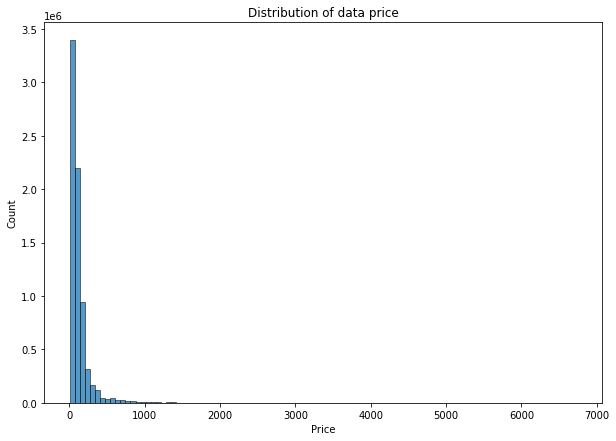

In [23]:
# Show distribution of data price

plt.figure(figsize=(10, 7))
sns.histplot(df_olist['price'], bins=100, palette='Set2')
plt.title('Distribution of data price')
plt.xlabel('Price')
plt.show()


- It can be seen that the scale of the x axis reaches 7000.
- This happens because there is data whose value is close to 7000.
- This can be validated by looking at the statistical description of the price column.

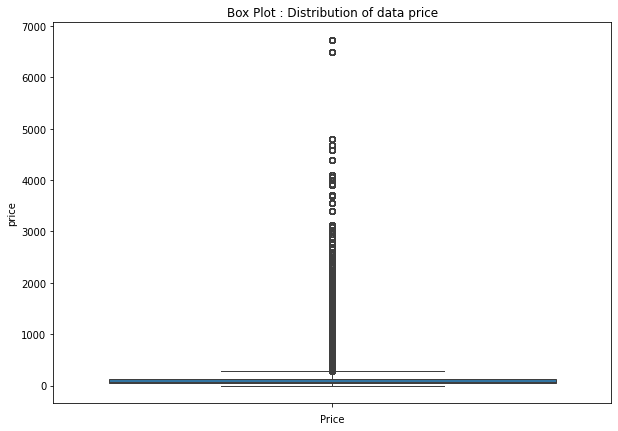

In [24]:
# Show in boxlot graph

plt.figure(figsize=(10,7))
sns.boxplot(df_olist['price'])
plt.title('Box Plot : Distribution of data price')
plt.xlabel('Price')
plt.show() 

In [25]:
# Generate descriptive stastistic at column 'price'
df_olist['price'].describe()

count    7.416192e+06
mean     1.209247e+02
std      1.842164e+02
min      8.500000e-01
25%      3.990000e+01
50%      7.490000e+01
75%      1.349000e+02
max      6.735000e+03
Name: price, dtype: float64

- It can be seen that the maximum value of the price column is 6735
- This number is very far compared to the Q3 value of 1349.
- The data above Q3 has the potential to be an outlier
- Let's assume there are indeed outliers

We will determine a data is an outlier, if its value is greater than Q3 + 1.5 IQR

In [26]:
'''Outliers Detection'''
# Calculate the upper and lower limits
#IQR

q1 = df_olist['price'].quantile(0.25)
q3 = df_olist['price'].quantile(0.75)

iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

print(f"Q1 : {q1}")
print(f"Q3 : {q3}")
print(f"IQR : {iqr}")
print(f"Upper : {upper}")
print(f"Lower : {lower}")

Q1 : 39.9
Q3 : 134.9
IQR : 95.0
Upper : 277.4
Lower : -102.6


In [27]:
# Filtering data without outliers
df_olist = df_olist[df_olist['price'] < upper]

In [28]:
# Validated outlier output
df_olist['price'].describe()

count    6.856000e+06
mean     8.383074e+01
std      5.850579e+01
min      8.500000e-01
25%      3.889000e+01
50%      6.900000e+01
75%      1.179900e+02
max      2.773000e+02
Name: price, dtype: float64

- It can be seen that Q3 and the maximum value are not far apart
- Outliers have been removed

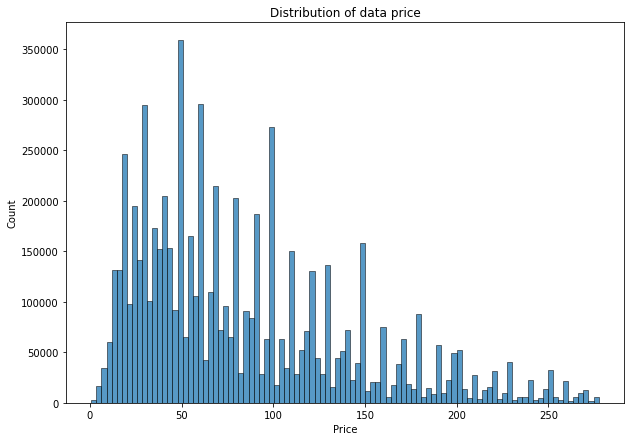

In [29]:
# Show distribution of data price

plt.figure(figsize=(10,7))
sns.histplot(df_olist['price'], bins=100)
plt.title('Distribution of data price')
plt.xlabel('Price')
plt.show()

### Identify inconsistent format

In [30]:
# Identify inconsistent format in 'product_category_name_english'

# Show the data
df_olist['product_category_name_english'].unique()

array(['office_furniture', 'housewares', 'home_confort', 'sports_leisure',
       'computers_accessories', 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashio_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances_2',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu_ray'

In [31]:
# Create a varialbe to replace inconsistent name
replace_product_name = {'home_confort':'home_comfort', 'home_comfort_2':'home_comfort', 'home_appliances_2':'home_appliances'}

# Replace it into dataframe
df_olist['product_category_name_english'].replace(replace_product_name, inplace=True)

df_olist['product_category_name_english'].unique()


array(['office_furniture', 'housewares', 'home_comfort', 'sports_leisure',
       'computers_accessories', 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashio_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'costruction_tools_tools', 'signaling_and_security',
       'musical_instruments', 'construction_tools_construction', 'music',
       'fashion_shoes', 'industry_commerce_and_business',
       'fashion_underwear_beach', 'dvds_blu_ray',
       'construction_tools

In [32]:
# Generate info of dataframe
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6856000 entries, 0 to 7416191
Data columns (total 14 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   customer_id                    object 
 1   customer_unique_id             object 
 2   customer_state                 object 
 3   order_id                       object 
 4   order_purchase_timestamp       object 
 5   payment_type                   object 
 6   payment_installments           int64  
 7   payment_value                  float64
 8   product_id                     object 
 9   seller_id                      object 
 10  price                          float64
 11  product_category_name_english  object 
 12  product_category               object 
 13  product_volume_cm3             float64
dtypes: float64(3), int64(1), object(10)
memory usage: 784.6+ MB


In [33]:
# Generate unique value in column order_purchase_timestamp 
df_olist['order_purchase_timestamp'].unique()

array(['2017-05-16 15:05:35', '2017-11-09 00:50:13',
       '2017-05-07 20:11:26', ..., '2017-05-17 17:44:34',
       '2017-01-26 11:09:00', '2017-09-17 16:51:43'], dtype=object)

From the information above, it can be seen that the column does not match the representation of the data type of the column:
- order_purchase_timestamp: Indicates the purchase timestamp - Because the value in this column begins with the year, we will change the yearfirst parameter in the to_datetime function.

In [34]:
# Convert order_purchase_timestamp
df_olist['order_purchase_timestamp'] = pd.to_datetime(df_olist['order_purchase_timestamp'], errors='coerce', yearfirst=True)

# Show data tanggal setelah di convert
df_olist['order_purchase_timestamp']

0         2017-05-16 15:05:35
1         2017-05-16 15:05:35
2         2017-05-16 15:05:35
3         2017-05-16 15:05:35
4         2017-05-16 15:05:35
                  ...        
7416187   2017-09-17 16:51:43
7416188   2017-09-17 16:51:43
7416189   2017-09-17 16:51:43
7416190   2017-09-17 16:51:43
7416191   2017-09-17 16:51:43
Name: order_purchase_timestamp, Length: 6856000, dtype: datetime64[ns]

### Identify duplicate data

In [35]:
# Check duplicate data of dataframe
df_olist[df_olist.duplicated(keep=False)]

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,payment_type,payment_installments,payment_value,product_id,seller_id,price,product_category_name_english,product_category,product_volume_cm3
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,Furniture,107136.0
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,Furniture,107136.0
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,Furniture,107136.0
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,Furniture,107136.0
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,credit_card,2,146.87,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,office_furniture,Furniture,107136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7416187,919570a26efbd068d6a0f66d5c5072a3,141e824b8e0df709e3fcf6d982225a8e,DF,bede3503afed051733eeb4a84d1adcc5,2017-09-17 16:51:43,boleto,1,115.45,8db75af9aed3315374db44d7860e25da,4e922959ae960d389249c378d1c939f5,100.00,security_and_services,Electronics,6292.0
7416188,919570a26efbd068d6a0f66d5c5072a3,141e824b8e0df709e3fcf6d982225a8e,DF,bede3503afed051733eeb4a84d1adcc5,2017-09-17 16:51:43,boleto,1,115.45,8db75af9aed3315374db44d7860e25da,4e922959ae960d389249c378d1c939f5,100.00,security_and_services,Electronics,6292.0
7416189,919570a26efbd068d6a0f66d5c5072a3,141e824b8e0df709e3fcf6d982225a8e,DF,bede3503afed051733eeb4a84d1adcc5,2017-09-17 16:51:43,boleto,1,115.45,8db75af9aed3315374db44d7860e25da,4e922959ae960d389249c378d1c939f5,100.00,security_and_services,Electronics,6292.0
7416190,919570a26efbd068d6a0f66d5c5072a3,141e824b8e0df709e3fcf6d982225a8e,DF,bede3503afed051733eeb4a84d1adcc5,2017-09-17 16:51:43,boleto,1,115.45,8db75af9aed3315374db44d7860e25da,4e922959ae960d389249c378d1c939f5,100.00,security_and_services,Electronics,6292.0


In [36]:
# Delete duplicate data
df_olist = df_olist.drop_duplicates(keep='first').reset_index(drop=True)

In [37]:
# Check duplication across DataFrames
duplicate_df_olist = df_olist.duplicated(keep='first', subset=None)

# Check if there is duplication in all DataFrames
if duplicate_df_olist.any():
    # There is data duplication
    print("There is duplicate data in DataFrame df_olist")
    # Display rows that are duplicates
    duplicate_rows = df_olist[duplicate_df_olist]
    print(duplicate_rows)
else:
    # No duplication of data
    print("No data duplication in DataFrame df_olist")

df_olist[df_olist.duplicated()]

No data duplication in DataFrame df_olist


,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,payment_type,payment_installments,payment_value,product_id,seller_id,price,product_category_name_english,product_category,product_volume_cm3


# Explorating Data and Analysis

1. Number of order per each product category

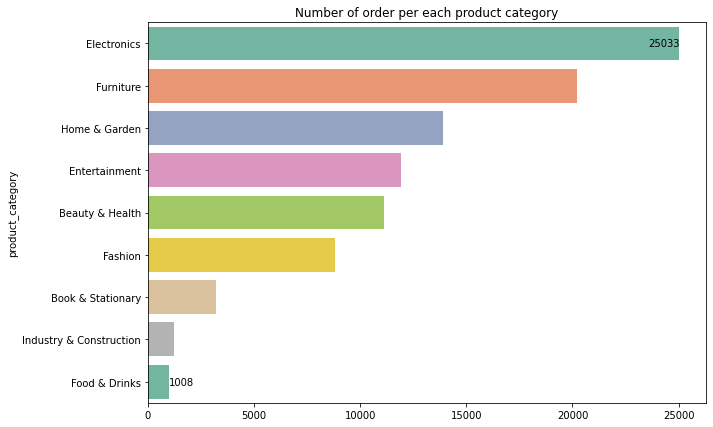

In [38]:
# Visualize the data of product category with bar plots 

plt.figure(figsize=(10,7))
ax = sns.barplot(x=df_olist['product_category'].value_counts().values, y=df_olist['product_category'].value_counts().index, palette='Set2')
plt.title('Number of order per each product category')
max_values = df_olist.groupby('product_category')['product_category'].count().max()
min_values = df_olist.groupby('product_category')['product_category'].count().min()
for index, value in enumerate(df_olist['product_category'].value_counts().values):
    if value == max_values:
        ax.text(value, index, f'{value}', ha='right', va='center')
    if value == min_values:
        ax.text(value, index, f'{value}', ha='left', va='center')
plt.show()

Electronics as the most ordered product category with 25033 orders and food & drinks as the least ordered product category with 1008 orders.

2. Product categories in Electronics

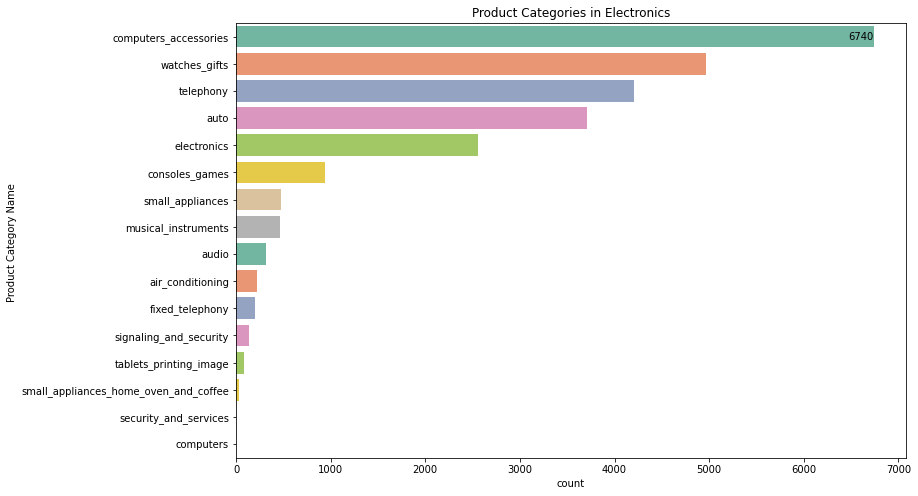

In [39]:
# Show product categories in Electronics

# Filter DataFrame for product_category equal to "Electronics"
electronic_df = df_olist[df_olist['product_category'] == 'Electronics']

# Count the number of occurrences of each product_category_name_english
category_count = electronic_df['product_category_name_english'].value_counts().reset_index()
category_count.columns = ['product_category_name_english', 'count']

# Sort DataFrame descendingly by its number
category_count = category_count.sort_values(by='count', ascending=False)
max_category_count = category_count['count'].max()


# Visualize the data with bar plots
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='count', y='product_category_name_english', data=category_count, palette='Set2')
plt.title('Product Categories in Electronics')
plt.ylabel('Product Category Name ')
highest_count_category = category_count[category_count['count'] == max_category_count]['product_category_name_english'].values[0]
ax.text(max_category_count, 0, f'{max_category_count}', ha='right', va='center', fontsize=10)
plt.show()

The product category's most ordered items, totaling 6740, are evidently computer accessories.

3. Show top 3 for each product category name by product category

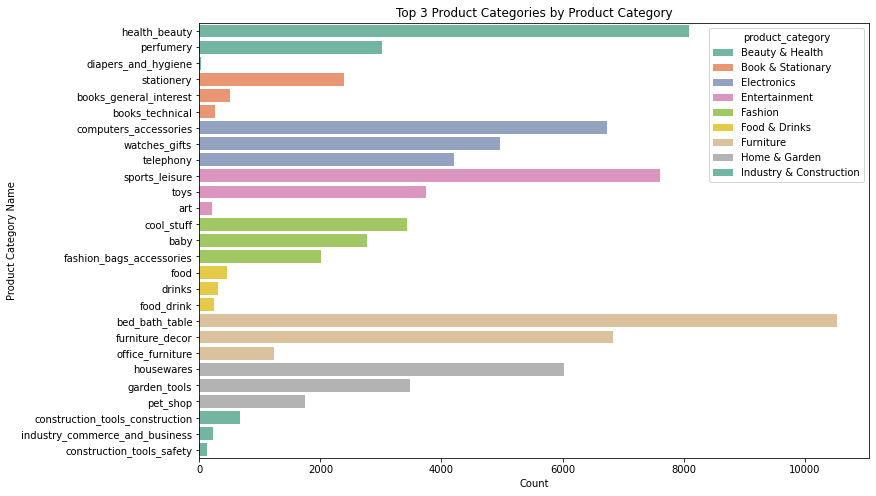

In [40]:
# Grouped the data based on 'product_category' and 'product_category_name_english', then counted the number.
category_counts = df_olist.groupby(['product_category', 'product_category_name_english']).size().reset_index(name='count')

# Filtering the top 3 product_category_name_english in each product_category
top_categories = category_counts.groupby('product_category').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Visualize for each product_category with bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_categories, x='count', y='product_category_name_english', hue='product_category', palette='Set2')
plt.xlabel('Count')
plt.ylabel('Product Category Name')
plt.title('Top 3 Product Categories by Product Category')
plt.show()

Health Beauty, Stationery, Computer accessories, Sport Leisure, Cool Stuff, Food, Bed Bath Table, Housewares, Construction tools construction are the most item ordered for each product category

4. Top 10 Customer state capacity

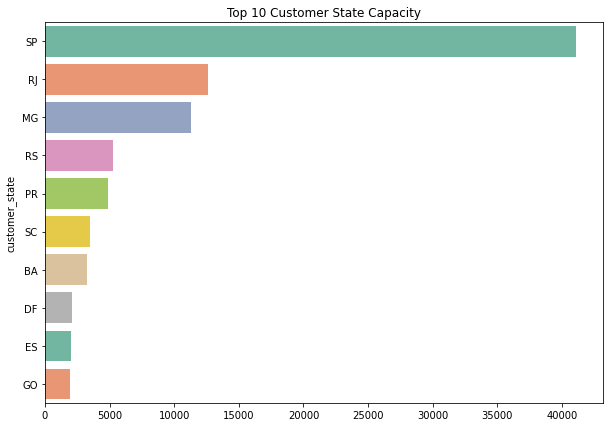

In [41]:
# Show Top 10 customer state capacities
plt.figure(figsize=(10,7))
sns.barplot(x=df_olist['customer_state'].value_counts().values[:10], y=df_olist['customer_state'].value_counts().index[:10], palette='Set2')
plt.title('Top 10 Customer State Capacity')
plt.show()

It can be seen that the state SP (São Paulo) is the country that makes the most orders of 41115. SP (São Paulo) state code can be found at (https://brazil-help.com/brazilian_states.htm)

5. Revenue for each state

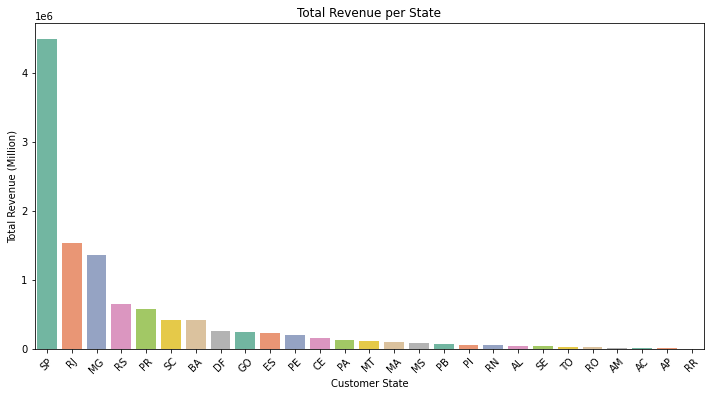

In [42]:
# Group state by payment value

state_revenue = df_olist.groupby('customer_state')['payment_value'].sum().reset_index()

# Sorting descending state revenue
state_revenue = state_revenue.sort_values(by='payment_value', ascending=False)

# Visualize state revenue with bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='payment_value', data=state_revenue, palette='Set2')
plt.title('Total Revenue per State')
plt.xlabel('Customer State')
plt.ylabel('Total Revenue (Million)')
plt.xticks(rotation=45)
plt.show()

SP(São Paulo) is the state with the highest revenue of 4493263.20 and RR (Roraima) has the lowest revenue of 6678.50.

6. Monthly Revenue

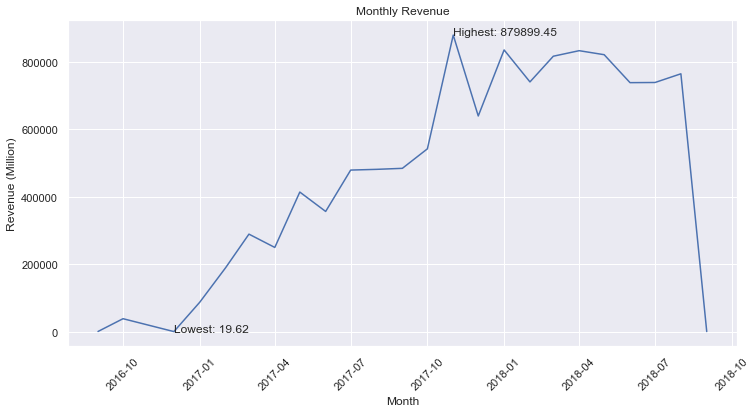

In [43]:
# Extract order_purchase_timestamp into order_month
df_olist['order_month'] = df_olist['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# Groupby order_month by payment_value to get monthly revenue
monthly_revenue = df_olist.groupby('order_month')['payment_value'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.lineplot(x='order_month', y='payment_value', data=monthly_revenue)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (Million)')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Find the month with the highest revenue
max_revenue_point = monthly_revenue.loc[monthly_revenue['payment_value'].idxmax()]
min_revenue_point = monthly_revenue.loc[monthly_revenue['payment_value'].idxmin()]

# Annotate the highest revenue point
plt.annotate(f'Highest: {max_revenue_point["payment_value"]:.2f}', 
             xy=(max_revenue_point['order_month'], max_revenue_point['payment_value']),
             xytext=(max_revenue_point['order_month'], max_revenue_point['payment_value'] + 1000), 
             arrowprops=dict(arrowstyle='->'))

# Annotate the lowest revenue point
plt.annotate(f'Lowest: {min_revenue_point["payment_value"]:.2f}', 
             xy=(min_revenue_point['order_month'], min_revenue_point['payment_value']),
             xytext=(min_revenue_point['order_month'], min_revenue_point['payment_value'] - 1000), 
             arrowprops=dict(arrowstyle='->'))

plt.show()

It is apparent that November 2017 had the largest revenue, totaling 879899.45, while December 2012 had the lowest revenue, totaling 19.62

7. Total revenue per each product category

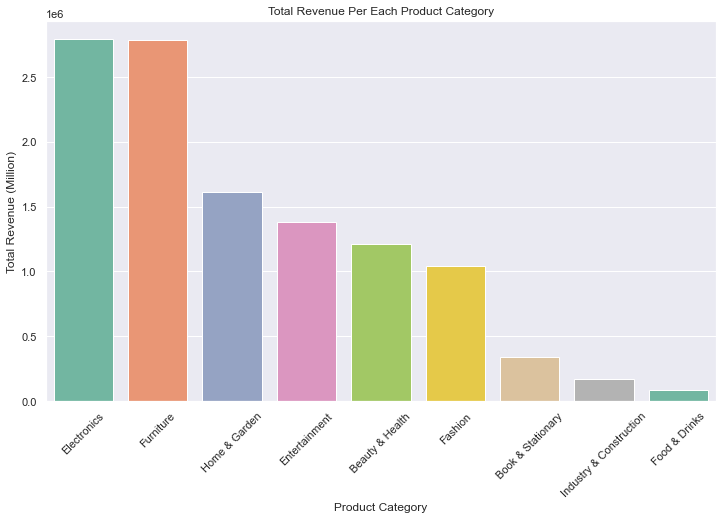

In [44]:
# Groupby product_category with paymeny_value to get revenue product category
revenue_product_cat = df_olist.groupby('product_category')['payment_value'].sum().reset_index()

# Sorting descending revenue product category
revenue_product_cat = revenue_product_cat.sort_values(by='payment_value', ascending=False)

#Visualisize with barplot
plt.figure(figsize=(12,7))
sns.barplot(x='product_category', y='payment_value', data=revenue_product_cat, palette='Set2')
plt.title('Total Revenue Per Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (Million)')
plt.xticks(rotation=45)
plt.show()

Food & Beverages has the lowest revenue at 82544.05, while electronics is the product category with the highest revenue at 2794148.72

8. The relationship between the price of the product and the payment value.

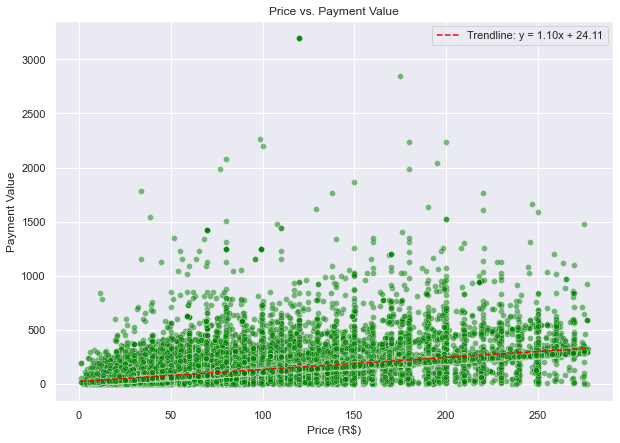

In [45]:
# The relationship between the price of the product and the payment value.

# Visualize with Scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='price', y='payment_value', data=df_olist, color='green', alpha=0.5)
plt.title('Price vs. Payment Value')
plt.xlabel('Price (R$)')
plt.ylabel('Payment Value')

# Calculate the regression coefficient and intercept
slope, intercept = np.polyfit(df_olist['price'], df_olist['payment_value'], 1)

# Create an array of x-values for the linear trend line
x = np.array([df_olist['price'].min(), df_olist['price'].max()])

# Create an array of y-values for the linear trend line using the regression equation
y = slope * x + intercept

# Add a linear trend line to the plot
plt.plot(x, y, color='red', linestyle='--', label=f'Trendline: y = {slope:.2f}x + {intercept:.2f}')
plt.legend()
plt.show()

- Positive Relationship: This visualization shows that there is a positive relationship between "price" and "payment_value," with the majority of the data points forming an upward pattern from left to right. Put another way, a product's payment value increases with its price.
- Outliers: Outliers are data points that deviate significantly from the general pattern. These outliers are transactions or high-priced products with a considerably higher payout value than other products. This could be a sign of some exceptional products or huge purchases that result in larger payments than the price.
- Data Concentration: The majority of the data points have relatively low price ranges and payment values. This shows that the majority of transactions involve the purchase of decently priced goods.

9. The relationship between Product Volume and the Price.

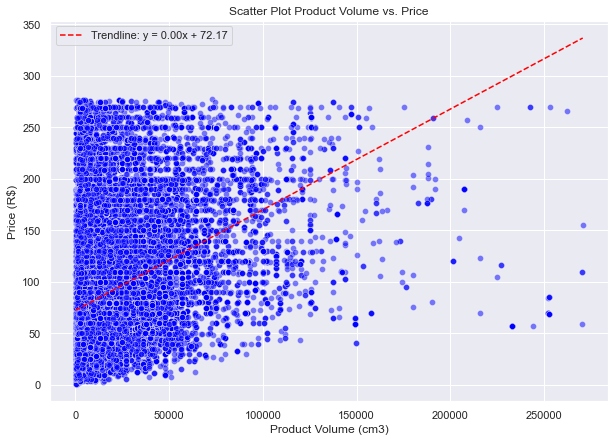

In [46]:
# The relationship between Product Volume and the Price.

# Visualize with Scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='product_volume_cm3', y='price', data=df_olist, color='blue', alpha=0.5)
plt.title('Scatter Plot Product Volume vs. Price')
plt.xlabel('Product Volume (cm3)')
plt.ylabel('Price (R$)')

# Calculate the regression coefficient and intercept
slope, intercept = np.polyfit(df_olist['product_volume_cm3'], df_olist['price'], 1)

# Create an array of x-values for the linear trend line
x = np.array([df_olist['product_volume_cm3'].min(), df_olist['product_volume_cm3'].max()])

# Create an array of y-values for the linear trend line using the regression equation
y = slope * x + intercept

# Add a linear trend line to the plot
plt.plot(x, y, color='red', linestyle='--', label=f'Trendline: y = {slope:.2f}x + {intercept:.2f}')
plt.legend()
plt.show()

- Positive Relationship: This visualization shows that there is a positive relationship between "product_volume_cm3" and "price" with the majority of the data points forming an upward pattern from left to right. Put another way, a product volumes value increases with its price.
- Data Concentration: The majority of the data points have relatively small product volume and price. This shows that the majority of transactions involve the purchase of decently priced goods.

10. Average Price over Time by Product Category

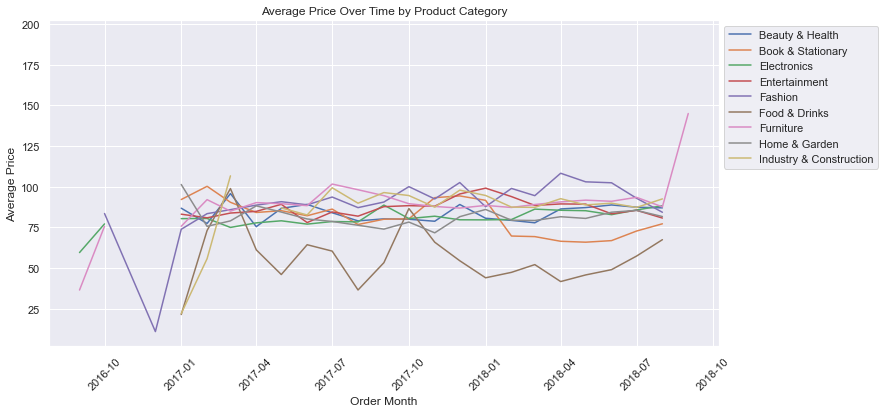

In [47]:
# Group the data by 'order_month' and 'product_category' and calculate the mean 'price'
avg_price = df_olist.groupby(['order_month', 'product_category'])['price'].mean().unstack()

# Visualize with line plot
plt.figure(figsize=(12, 6))
for category in avg_price.columns:
    plt.plot(avg_price.index, avg_price[category], label=category)

plt.title('Average Price Over Time by Product Category')
plt.xlabel('Order Month')
plt.ylabel('Average Price')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

We can look at the average monthly price change for each category.

11. Payment Type Distribution

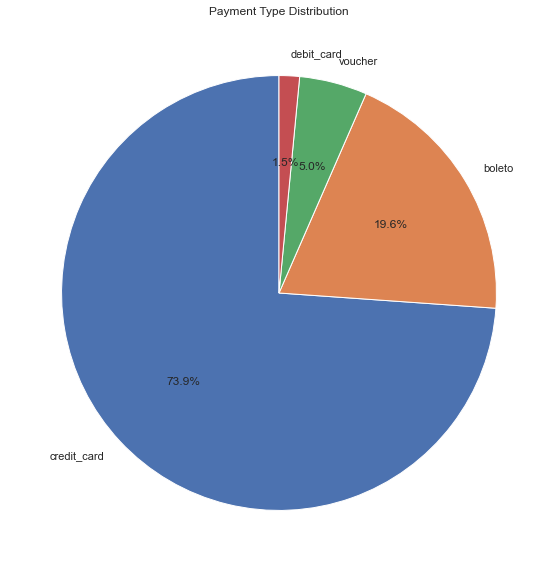

In [48]:
plt.figure(figsize=(10,10))
plt.pie(df_olist['payment_type'].value_counts().values, 
        autopct='%1.1f%%', 
        shadow=False, startangle=90,
        labels=df_olist['payment_type'].value_counts().index)
plt.title('Payment Type Distribution')
plt.show()

It seems obvious that the majority of customers (73.9%) pay with credit cards while placing orders.

12. Payment Installement

In [49]:
df_olist['payment_installments'].value_counts()

payment_installments
1     49997
2     12038
3     10028
4      6685
5      4851
10     3919
6      3409
8      3277
7      1442
9       571
12      117
15       54
11       24
18       20
13       17
14       14
24       12
20       10
17        7
16        5
21        3
0         2
23        1
22        1
Name: count, dtype: int64

In [50]:
# Delete a value of 0 in the payment_installment column in the dataframe
df_olist = df_olist[df_olist['payment_installments'] !=0 ]

df_olist.reset_index(drop=True, inplace=True)

In [51]:
# filter data with payment installment value 0
null_payment_instalment = df_olist[df_olist['payment_installments'] == 0]

null_payment_instalment

,customer_id,customer_unique_id,customer_state,order_id,order_purchase_timestamp,payment_type,payment_installments,payment_value,product_id,seller_id,price,product_category_name_english,product_category,product_volume_cm3,order_month


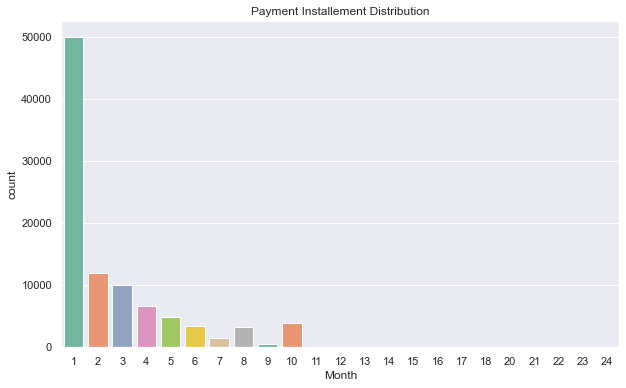

In [52]:
# Visulisize payment installment with countplot
plt.figure(figsize=(10,6))
sns.countplot(x=df_olist['payment_installments'], palette='Set2')
plt.title('Payment Installement Distribution')
plt.xlabel('Month')
plt.show()

It is apparent that the majority of clients (49997) pay by credit card in 1-month installments when placing an order.